<a href="https://colab.research.google.com/github/Jackline-Jebet/Msc-Financial-Engineering_Quant-Finance-Projects/blob/main/Financial-Econometrics/MScFE_610_Financial_Econometrics_GWP1___Group_10837.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**MScFE 610: FINANCIAL ECONOMETRICS**

**GROUP WORK PROJECT 1,**
**GROUP N0: 10837**

**TEAM MEMBERS**

1. Jackline Jebet,Kenya, jebet.jackline.r@gmail.com

2. Piyush Tripathi, India, piyush007978@gmail.com

3. Santhesh A X, India, sandesh_2190@ymail.com


# **Task 1d**

The code generates the data, estimates the models, and produces the results table.

**Output Description:**

The code runs 1000 simulations for sample sizes n = 100 and n = 1000.
It generates X and Z with a correlation of 0.5, computes Y, and estimates b in both the full and reduced models.
The results table shows the mean and standard error of b estimates.
A histogram visualizes the distribution of b estimates for n = 100, highlighting the bias in the reduced model.


*   The simulation uses OLS estimation via statsmodels.
*   The true model is Y(i) = 1 + 2X(i) + 1.5Z(i) + e(i).
The bias in the reduced model’s b estimate is due to the correlation (ρ = 0.5) between X and Z.
*   Increasing sample size improves precision (lower standard errors) but does not correct the bias.

In [ ]:
# Problem 1d:Simulation experiment — summary, interpretation, and effect of sample size

import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt


np.random.seed(42)

# Simulation parameters
a, b, c = 1, 2, 1.5
n_values = [100, 1000]
n_sim = 1000
rho = 0.5

# Function to simulate data and estimate models
def simulate_and_estimate(n):
    b_full, b_reduced = [], []

    for _ in range(n_sim):

        mean = [0, 0]
        cov = [[1, rho], [rho, 1]]
        X, Z = np.random.multivariate_normal(mean, cov, n).T
        e = np.random.normal(0, 1, n)


        Y = a + b * X + c * Z + e

        # Full model: Y = a + bX + cZ + e
        X_full = sm.add_constant(np.vstack((X, Z)).T)
        model_full = sm.OLS(Y, X_full).fit()
        b_full.append(model_full.params[1])

        # Reduced model: Y = a + bX + u
        X_reduced = sm.add_constant(X)
        model_reduced = sm.OLS(Y, X_reduced).fit()
        b_reduced.append(model_reduced.params[1])

    return np.mean(b_full), np.std(b_full), np.mean(b_reduced), np.std(b_reduced)


# Run simulations and collect results
results = []
for n in n_values:
    b_full_mean, b_full_std, b_reduced_mean, b_reduced_std = simulate_and_estimate(n)
    results.append([n, f"{b_full_mean:.2f} ({b_full_std:.2f})", f"{b_reduced_mean:.2f} ({b_reduced_std:.2f})"])

# Results table
results_df = pd.DataFrame(results, columns=["Sample Size", "Full Model (b)", "Reduced Model (b)"])
print("\nSimulation Results:")
print(results_df)


Simulation Results:
   Sample Size Full Model (b) Reduced Model (b)
0          100    2.00 (0.11)       2.75 (0.16)
1         1000    2.00 (0.04)       2.75 (0.05)


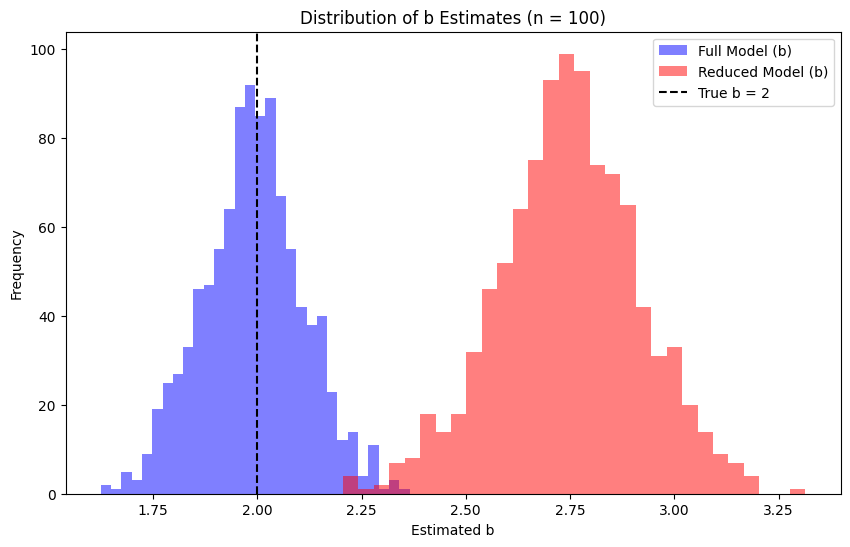

In [ ]:
# Plot histogram of b estimates for n = 100
n = 100
b_full, b_reduced = [], []
for _ in range(n_sim):
    X, Z = np.random.multivariate_normal([0, 0], [[1, rho], [rho, 1]], n).T
    e = np.random.normal(0, 1, n)
    Y = a + b * X + c * Z + e
    X_full = sm.add_constant(np.vstack((X, Z)).T)
    X_reduced = sm.add_constant(X)
    b_full.append(sm.OLS(Y, X_full).fit().params[1])
    b_reduced.append(sm.OLS(Y, X_reduced).fit().params[1])

plt.figure(figsize=(10, 6))
plt.hist(b_full, bins=30, alpha=0.5, label="Full Model (b)", color="blue")
plt.hist(b_reduced, bins=30, alpha=0.5, label="Reduced Model (b)", color="red")
plt.axvline(x=2, color="black", linestyle="--", label="True b = 2")
plt.title("Distribution of b Estimates (n = 100)")
plt.xlabel("Estimated b")
plt.ylabel("Frequency")
plt.legend()
plt.show()

#**Task 2b**

The code below generates the baseline data, adds outliers, fits the models, prints the estimates, and creates a plot.

The code uses numpy, statsmodels, and matplotlib for simulation, regression, and visualization.

Baseline Intercept: 2.00
Baseline Slope: 2.93
With Outliers Intercept: 2.02
With Outliers Slope: 3.00


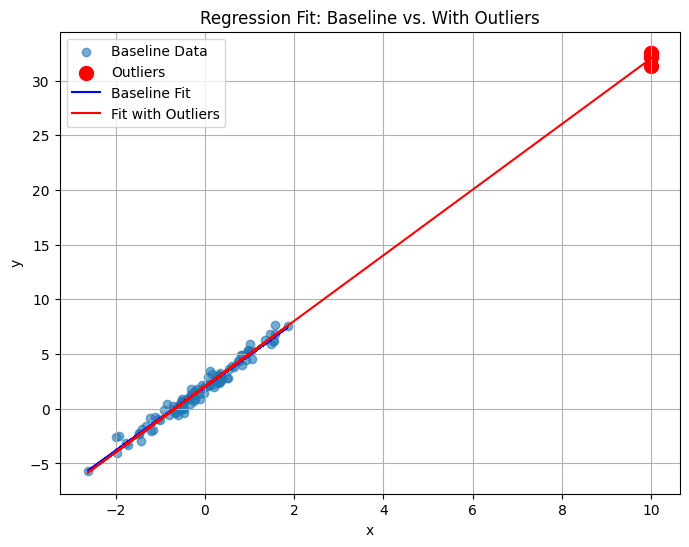

           Model  Intercept     Slope
0       Baseline   2.003714  2.928371
1  With Outliers   2.017489  3.002971


In [ ]:
# Problem 2b: Simulation of Regression with Outliers
# Description: Simulate y = 2 + 3x + e, fit model without and with outliers, compare estimates.


np.random.seed(42)

# Parameters
n = 100
beta0 = 2
beta1 = 3
sigma = 0.5

# Generating x from normal distribution
x = np.random.normal(0, 1, n)

# Baseline y without outliers
e = np.random.normal(0, sigma, n)
y_baseline = beta0 + beta1 * x + e

# Fit baseline model
X_baseline = sm.add_constant(x)
model_baseline = sm.OLS(y_baseline, X_baseline).fit()
intercept_baseline = model_baseline.params[0]
slope_baseline = model_baseline.params[1]

print(f"Baseline Intercept: {intercept_baseline:.2f}")
print(f"Baseline Slope: {slope_baseline:.2f}")

# Outliers: 5 points with x=10 (extreme value)
n_outliers = 5
x_outliers = np.full(n_outliers, 10)
e_outliers = np.random.normal(0, sigma, n_outliers)
y_outliers = beta0 + beta1 * x_outliers + e_outliers

# Combine data with outliers
x_with_outliers = np.concatenate([x, x_outliers])
y_with_outliers = np.concatenate([y_baseline, y_outliers])

# Fit model with outliers
X_with_outliers = sm.add_constant(x_with_outliers)
model_with_outliers = sm.OLS(y_with_outliers, X_with_outliers).fit()
intercept_with_outliers = model_with_outliers.params[0]
slope_with_outliers = model_with_outliers.params[1]

print(f"With Outliers Intercept: {intercept_with_outliers:.2f}")
print(f"With Outliers Slope: {slope_with_outliers:.2f}")

plt.figure(figsize=(8, 6))
plt.scatter(x, y_baseline, label='Baseline Data', alpha=0.6)
plt.scatter(x_outliers, y_outliers, color='red', label='Outliers', s=100)
plt.plot(x, model_baseline.predict(X_baseline), color='blue', label='Baseline Fit')
plt.plot(x_with_outliers, model_with_outliers.predict(X_with_outliers), color='red', label='Fit with Outliers')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Regression Fit: Baseline vs. With Outliers')
plt.grid(True)
plt.show()

# Table of estimates (for output)
estimates = pd.DataFrame({
    'Model': ['Baseline', 'With Outliers'],
    'Intercept': [intercept_baseline, intercept_with_outliers],
    'Slope': [slope_baseline, slope_with_outliers]
})
print(estimates)

# **Task 3**
Model selection using OLS (with exhaustive search and stepwise selection),
and comparison with Weighted Least Squares (WLS) and Lasso regression,
and generation of diagnostic plots and evaluation metrics.

**Dataset:** `FE-GWP1_model_selection_1.csv`


In [ ]:
import numpy as np

# Patch for deprecated aliases removed in NumPy >=1.24
if not hasattr(np, "float"):
    np.float = float
if not hasattr(np, "int"):
    np.int = int
if not hasattr(np, "bool"):
    np.bool = bool
if not hasattr(np, "long"):
    np.long = int


In [ ]:
import itertools

import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LassoCV, Lasso
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
import math
import os

# Load dataset
df = pd.read_csv("FE-GWP1_model_selection_1.csv")
df = df.rename(columns={'Y':'y','X1':'x1','X2':'x2','X3':'x3','X4':'x4','X5':'x5'})
y = df['y']
all_predictors = ['x1','x2','x3','x4','x5']

OUT_DIR = "model_selection_outputs"
os.makedirs(OUT_DIR, exist_ok=True)
df.head()

,y,x1,x2,x3,x4,x5
0,3.388410,0.017954,-0.800583,-0.352454,2.187210,1.014887
1,0.287191,0.083057,-0.597947,-0.357639,-1.630284,0.221841
2,3.989645,-0.923437,-1.386575,1.180202,0.632606,-1.576638
3,-2.959602,-0.313775,2.955133,-1.798692,-2.117621,0.159291
4,0.529773,0.388996,1.019611,0.472062,0.590497,0.877048


## Exploratory Data Analysis

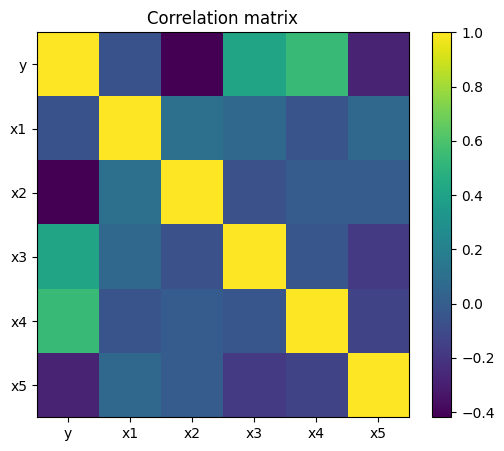

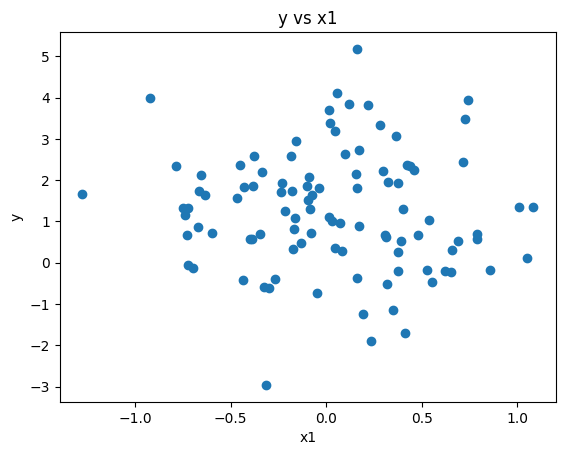

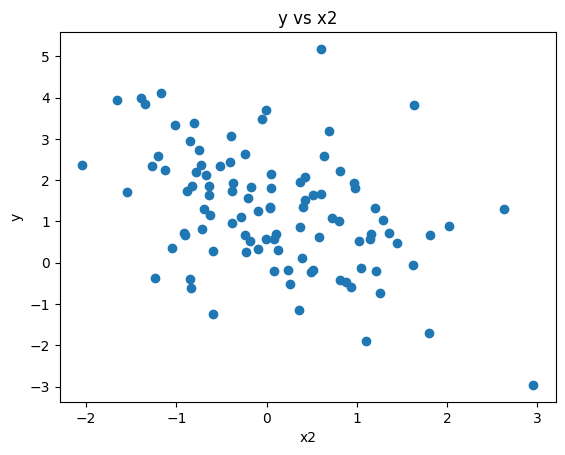

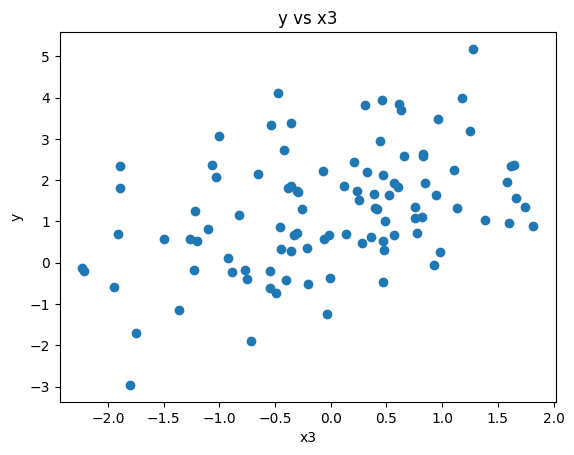

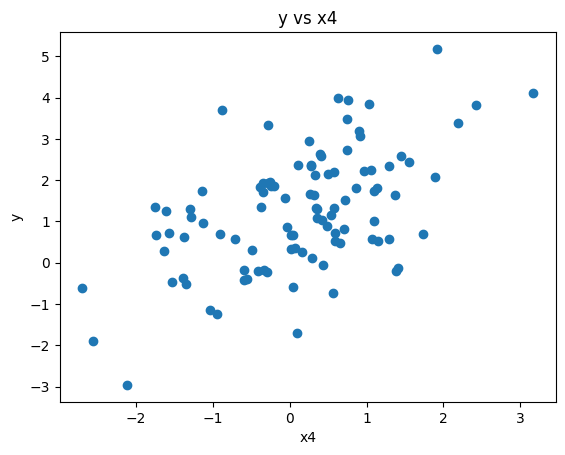

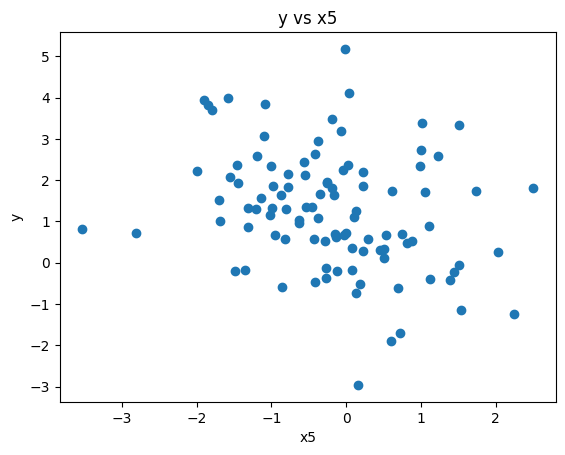

In [ ]:
# Correlation matrix
corr = df[['y']+all_predictors].corr()
fig, ax = plt.subplots(figsize=(6,5))
cax = ax.imshow(corr.values, aspect='auto')
ax.set_xticks(range(len(corr.columns)))
ax.set_yticks(range(len(corr.index)))
ax.set_xticklabels(corr.columns)
ax.set_yticklabels(corr.index)
ax.set_title('Correlation matrix')
plt.colorbar(cax, ax=ax)
plt.show()

# Scatterplots
for x in all_predictors:
    plt.figure()
    plt.scatter(df[x], y)
    plt.xlabel(x)
    plt.ylabel("y")
    plt.title(f"y vs {x}")
    plt.show()

## Exhaustive Subset Selection (AIC, BIC, AdjR²)

In [ ]:
results = []
for k in range(1, len(all_predictors)+1):
    for combo in itertools.combinations(all_predictors, k):
        X = sm.add_constant(df[list(combo)])
        mod = sm.OLS(y, X).fit()
        results.append({'predictors': combo,'aic': mod.aic,'bic': mod.bic,'adjr2': mod.rsquared_adj})
subsets_df = pd.DataFrame(results)
display(subsets_df.sort_values('aic').head())

best_aic = subsets_df.loc[subsets_df['aic'].idxmin()]
best_bic = subsets_df.loc[subsets_df['bic'].idxmin()]
best_adjr2 = subsets_df.loc[subsets_df['adjr2'].idxmax()]
best_aic, best_bic, best_adjr2

,predictors,aic,bic,adjr2
29,"(x2, x3, x4, x5)",260.616684,273.642535,0.633974
30,"(x1, x2, x3, x4, x5)",262.592528,278.223549,0.630170
21,"(x2, x3, x4)",264.291054,274.711735,0.616639
25,"(x1, x2, x3, x4)",266.191097,279.216948,0.612991
23,"(x2, x4, x5)",291.889597,302.310277,0.494796


(predictors    (x2, x3, x4, x5)
 aic                 260.616684
 bic                 273.642535
 adjr2                 0.633974
 Name: 29, dtype: object,
 predictors    (x2, x3, x4, x5)
 aic                 260.616684
 bic                 273.642535
 adjr2                 0.633974
 Name: 29, dtype: object,
 predictors    (x2, x3, x4, x5)
 aic                 260.616684
 bic                 273.642535
 adjr2                 0.633974
 Name: 29, dtype: object)

## Stepwise Selection (Forward and Backward using AIC)

In [ ]:
def fit_aic(predictors):
    if len(predictors)==0:
        X0 = np.ones((len(df),1))
        m = sm.OLS(y, X0).fit()
    else:
        m = sm.OLS(y, sm.add_constant(df[predictors])).fit()
    return m.aic

# Forward
remaining = set(all_predictors)
selected = []
current_aic = fit_aic([])
improved = True
while improved and remaining:
    improved = False
    best_candidate = None
    best_aic_val = current_aic
    for cand in sorted(remaining):
        aic_cand = fit_aic(selected + [cand])
        if aic_cand < best_aic_val - 1e-8:
            best_aic_val = aic_cand
            best_candidate = cand
    if best_candidate is not None:
        selected.append(best_candidate)
        remaining.remove(best_candidate)
        current_aic = best_aic_val
        improved = True
print("Forward selected:", selected)

# Backward
selected_back = all_predictors.copy()
current_aic = fit_aic(selected_back)
improved = True
while improved and len(selected_back) > 0:
    improved = False
    remove_candidate = None
    best_aic_val = current_aic
    for cand in selected_back:
        trial = [x for x in selected_back if x != cand]
        aic_cand = fit_aic(trial)
        if aic_cand < best_aic_val - 1e-8:
            best_aic_val = aic_cand
            remove_candidate = cand
    if remove_candidate is not None:
        selected_back.remove(remove_candidate)
        current_aic = best_aic_val
        improved = True
print("Backward selected:", selected_back)

Forward selected: ['x4', 'x3', 'x2', 'x5']
Backward selected: ['x2', 'x3', 'x4', 'x5']


## Final OLS Model and Diagnostics

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.649
Model:                            OLS   Adj. R-squared:                  0.634
Method:                 Least Squares   F-statistic:                     43.87
Date:                Mon, 15 Sep 2025   Prob (F-statistic):           8.29e-21
Time:                        12:52:10   Log-Likelihood:                -125.31
No. Observations:                 100   AIC:                             260.6
Df Residuals:                      95   BIC:                             273.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1893      0.089     13.333      0.000       1.012       1.366
x2            -0.5861      0.091     -6.440      0.000      -0.767      -0.405
x3             0.5592      0.091      6.124      0.000       0.378       0.740
x4             0.7105      0.082      8.672      0.000       0.548       0.873
x5            -0.1966      0.083     -2.355      0.021      -0.362      -0.031
==============================================================================
Omnibus:                        4.462   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.107   Jarque-Bera (JB):                3.920
Skew:                           0.473   Prob(JB):                        0.141
Kurtosis:                       3.215   Cond. No.                         1.39
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

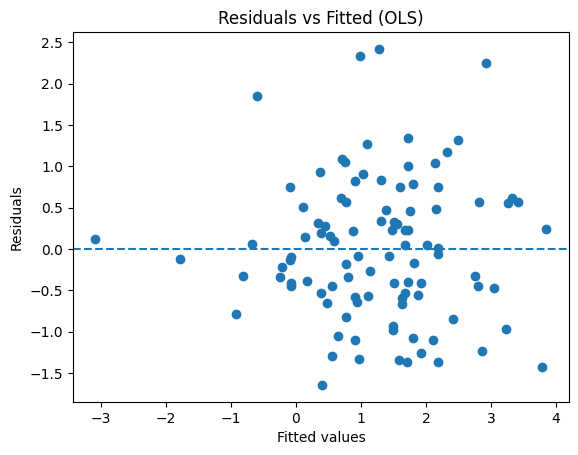

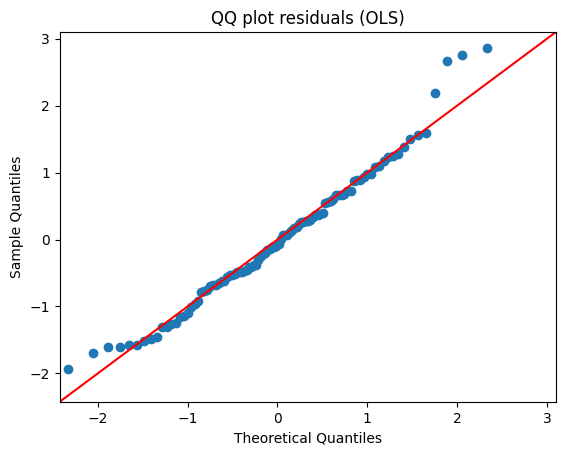

Training RMSE: 0.8471689697397924
VIFs: {'x2': np.float64(1.0056173622454176), 'x3': np.float64(1.0406154774789134), 'x4': np.float64(1.025783267173356), 'x5': np.float64(1.0566547666486088)}


In [ ]:
final_predictors = list(best_aic['predictors'])
X_final = sm.add_constant(df[final_predictors])
ols_final = sm.OLS(y, X_final).fit()
display(ols_final.summary())

resid = ols_final.resid
fitted = ols_final.fittedvalues
plt.scatter(fitted, resid)
plt.axhline(0, linestyle="--")
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted (OLS)")
plt.show()

sm.qqplot(resid, line="45", fit=True)
plt.title("QQ plot residuals (OLS)")
plt.show()

print("Training RMSE:", math.sqrt((resid**2).mean()))
X_vif = df[final_predictors]
vifs = {col: variance_inflation_factor(X_vif.values, i) for i,col in enumerate(X_vif.columns)}
print("VIFs:", vifs)

## Cross-validated RMSE for OLS

In [ ]:
def cv_rmse_predictors(predictor_list, cv=5):
    X = df[predictor_list].values
    lr = LinearRegression()
    kf = KFold(n_splits=cv, shuffle=True, random_state=1)
    scores = cross_val_score(lr, X, y.values, scoring='neg_mean_squared_error', cv=kf)
    return math.sqrt(-scores.mean())

cv_rmse_final = cv_rmse_predictors(final_predictors, cv=5)
print("Final OLS model CV RMSE:", cv_rmse_final)

Final OLS model CV RMSE: 0.8829685676430841


## Weighted Least Squares (WLS)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.726
Model:                            WLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     62.81
Date:                Mon, 15 Sep 2025   Prob (F-statistic):           7.45e-26
Time:                        12:52:10   Log-Likelihood:                -125.28
No. Observations:                 100   AIC:                             260.6
Df Residuals:                      95   BIC:                             273.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1894      0.087     13.687      0.000       1.017       1.362
x2            -0.6394      0.080     -8.021      0.000      -0.798      -0.481
x3             0.5120      0.087      5.857      0.000       0.338       0.686
x4             0.6627      0.072      9.172      0.000       0.519       0.806
x5            -0.2644      0.083     -3.202      0.002      -0.428      -0.100
==============================================================================
Omnibus:                        7.757   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.021   Jarque-Bera (JB):                7.665
Skew:                           0.530   Prob(JB):                       0.0217
Kurtosis:                       3.846   Cond. No.                         1.57
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

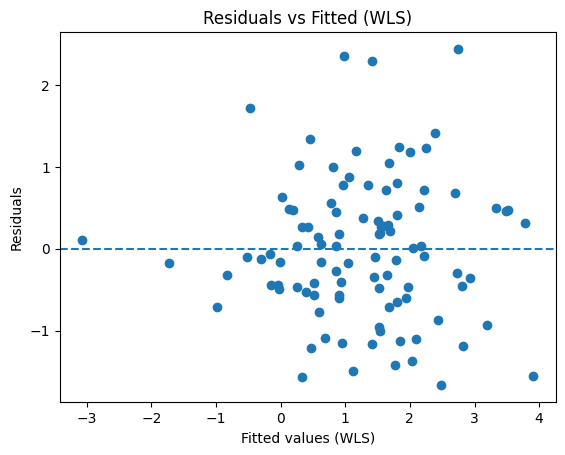

In [ ]:
X_full = sm.add_constant(df[all_predictors])
ols_full = sm.OLS(y, X_full).fit()
resid_full = ols_full.resid
log_r2 = np.log(resid_full**2 + 1e-8)
lm_var = sm.OLS(log_r2, X_full).fit()
pred_var = np.exp(lm_var.predict(X_full))
med = np.median(pred_var)
pred_var_clipped = np.clip(pred_var, med*0.01, med*100)
weights = 1.0 / pred_var_clipped
wls_model = sm.WLS(y, sm.add_constant(df[final_predictors]), weights=weights).fit()
display(wls_model.summary())

resid_wls = y - wls_model.fittedvalues
plt.scatter(wls_model.fittedvalues, resid_wls)
plt.axhline(0, linestyle="--")
plt.xlabel("Fitted values (WLS)")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted (WLS)")
plt.show()

## Lasso Regression

Lasso alpha: 0.009486588638548862
Lasso coefficients: {'x1': np.float64(-0.004937005604610252), 'x2': np.float64(-0.55157895789632), 'x3': np.float64(0.5357188601012735), 'x4': np.float64(0.7523130074516099), 'x5': np.float64(-0.20266477074909112)}


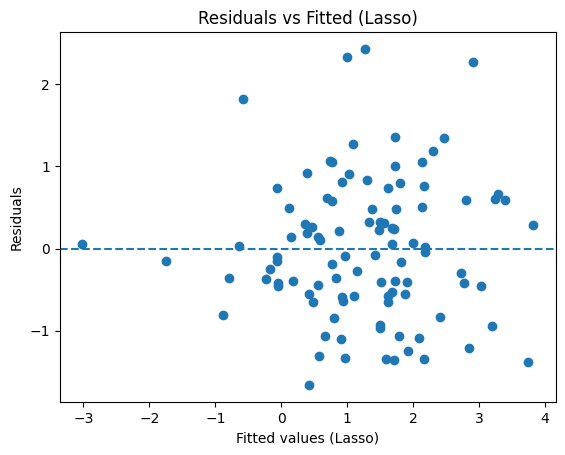

In [ ]:
scaler = StandardScaler()
X_all_scaled = scaler.fit_transform(df[all_predictors].values)
lasso_cv = LassoCV(cv=5, random_state=1, n_alphas=100, max_iter=5000).fit(X_all_scaled, y.values)
alpha_opt = lasso_cv.alpha_
lasso_best = Lasso(alpha=alpha_opt, max_iter=10000).fit(X_all_scaled, y.values)
lasso_coefs = dict(zip(all_predictors, lasso_best.coef_))
print("Lasso alpha:", alpha_opt)
print("Lasso coefficients:", lasso_coefs)

y_pred_lasso = lasso_best.predict(X_all_scaled)
resid_lasso = y - y_pred_lasso
plt.scatter(y_pred_lasso, resid_lasso)
plt.axhline(0, linestyle="--")
plt.xlabel("Fitted values (Lasso)")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted (Lasso)")
plt.show()

###**Part 4b Elasticity**



- **Log-Log Model (c) is often preferred for elasticity**: In economics, the log-log model $\ln(y) = 0.1 + 0.25 \ln(x)$ is commonly used when constant elasticity is assumed, as it directly provides the elasticity as the coefficient of $\ln(x)$. This model is theoretically appealing because elasticity is constant and does not depend on the values of $x$ or $y$.

Thus, Elasticity from model (c): $\ln(y) = 0.1 + 0.25 \ln(x)$ is
  $\epsilon_{y,x} = 0.25$.




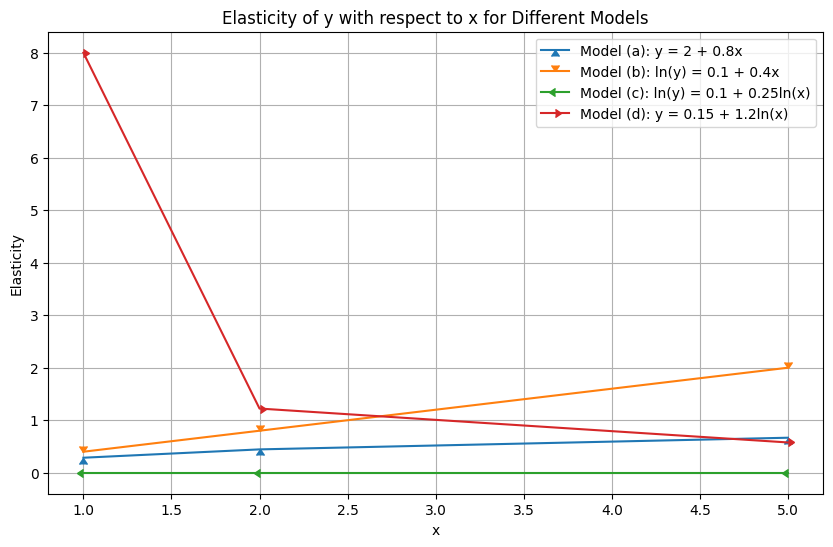


Part 4b: Assuming log-log model (c) is the correct model for elasticity.
Elasticity for model (c): ε = 0.25 (constant across all x values).


In [ ]:

# Define the x values for evaluation (for models where elasticity depends on x)
x_values = np.array([1, 2, 5])

# Model (a): y = 2 + 0.8x
def elasticity_a(x):
    y = 2 + 0.8 * x
    dy_dx = 0.8
    return dy_dx * x / y

# Model (b): ln(y) = 0.1 + 0.4x
def elasticity_b(x):
    # Since ln(y) = 0.1 + 0.4x, we have dy/dx = 0.4 * y
    # Elasticity = dy/dx * x/y = 0.4 * x
    return 0.4 * x

# Model (c): ln(y) = 0.1 + 0.25 ln(x)
def elasticity_c(x):
    # In log-log model, elasticity is the coefficient of ln(x)
    return 0.25

# Model (d): y = 0.15 + 1.2 ln(x)
def elasticity_d(x):
    y = 0.15 + 1.2 * np.log(x)
    dy_dx = 1.2 / x
    return dy_dx * x / y

# Compute elasticities for each model at x_values
elasticity_a_values = elasticity_a(x_values)
elasticity_b_values = elasticity_b(x_values)
elasticity_c_values = np.full_like(x_values, elasticity_c(x_values))  # Constant elasticity
elasticity_d_values = elasticity_d(x_values)

# Create a chart to visualize elasticities
plt.figure(figsize=(10, 6))
plt.plot(x_values, elasticity_a_values, label='Model (a): y = 2 + 0.8x', marker=6)
plt.plot(x_values, elasticity_b_values, label='Model (b): ln(y) = 0.1 + 0.4x', marker=7)
plt.plot(x_values, elasticity_c_values, label='Model (c): ln(y) = 0.1 + 0.25ln(x)', marker=8)
plt.plot(x_values, elasticity_d_values, label='Model (d): y = 0.15 + 1.2ln(x)', marker=9)
plt.xlabel('x')
plt.ylabel('Elasticity')
plt.title('Elasticity of y with respect to x for Different Models')
plt.legend()
plt.grid(True)
plt.show()

# Part 4b: Assuming model (c) is the "correct" model for constant elasticity
print("\nPart 4b: Assuming log-log model (c) is the correct model for elasticity.")
print("Elasticity for model (c): ε = 0.25 (constant across all x values).")

# **Task 5b**



In [ ]:
from statsmodels.tsa.stattools import adfuller

# Load CSV file
df = pd.read_csv("sp500_prices.csv", index_col=0, parse_dates=True)
df.rename(columns={'SP500':'Price'}, inplace=True)
df.head()


,Price
2015-01-01,3000.099343
2015-01-02,3000.071690
2015-01-05,3000.201228
2015-01-06,3000.505834
2015-01-07,3000.459003


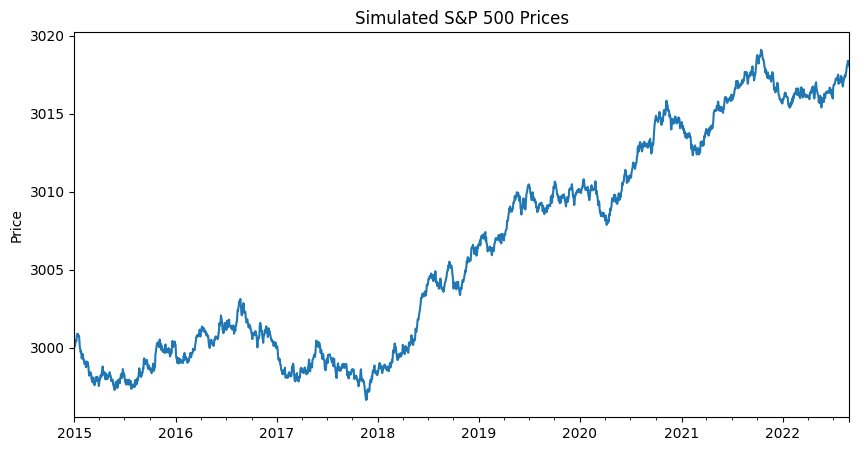

In [ ]:
# Plot prices
df['Price'].plot(figsize=(10,5), title="Simulated S&P 500 Prices")
plt.ylabel("Price")
plt.show()


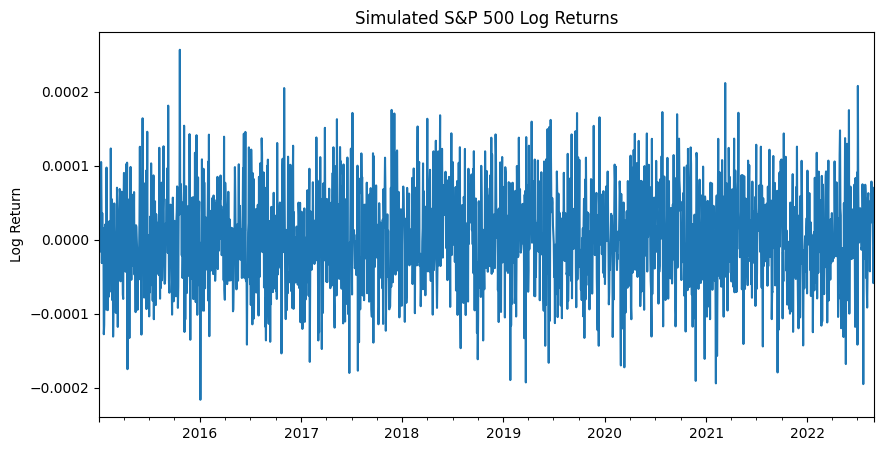

In [ ]:
# Compute log returns
df['LogReturn'] = np.log(df['Price']).diff()
df['LogReturn'].dropna().plot(figsize=(10,5), title="Simulated S&P 500 Log Returns")
plt.ylabel("Log Return")
plt.show()


In [ ]:
# ADF test on price
adf_price = adfuller(df['Price'].dropna())
print("ADF Test on Prices")
print("Test Statistic:", adf_price[0])
print("p-value:", adf_price[1])

# ADF test on returns
adf_ret = adfuller(df['LogReturn'].dropna())
print("\nADF Test on Log Returns")
print("Test Statistic:", adf_ret[0])
print("p-value:", adf_ret[1])


ADF Test on Prices
Test Statistic: 0.18788980612019882
p-value: 0.9715741318314691

ADF Test on Log Returns
Test Statistic: -45.114904410103655
p-value: 0.0



### Interpretation
- The ADF test on **prices** typically shows a **high p-value** → cannot reject null → prices are non-stationary (unit root).
- The ADF test on **returns** shows a **low p-value** → reject null → returns are stationary.

This matches financial theory: asset prices follow a random walk, while returns are mean-reverting.



## Simulation: Unit Root vs Explosive Root

We simulate two AR(1) processes:

- **Unit Root (φ = 1):** Random walk (non-stationary but not explosive)
- **Explosive Root (φ = 1.5):** Process diverges to infinity, unrealistic in economics/finance


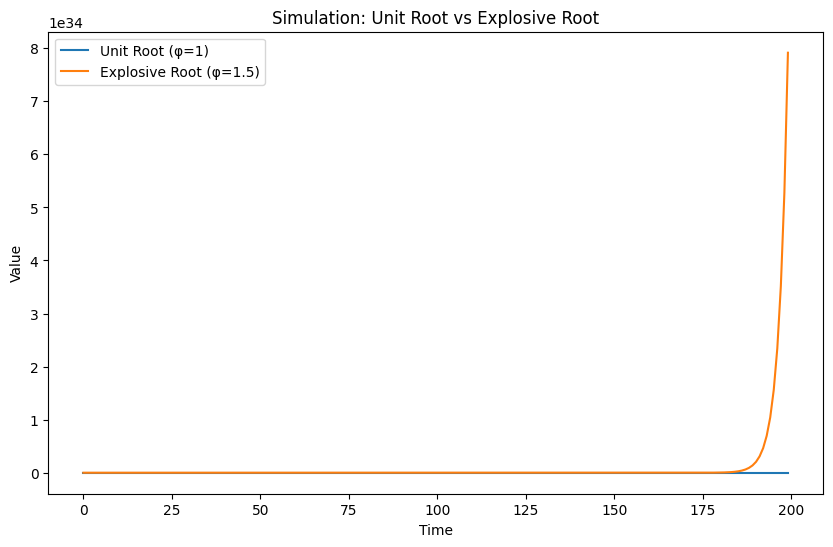

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
n = 200
eps = np.random.normal(size=n)

# Unit root (phi = 1)
y1 = np.zeros(n)
for t in range(1, n):
    y1[t] = y1[t-1] + eps[t]

# Explosive root (phi = 1.5)
y2 = np.zeros(n)
for t in range(1, n):
    y2[t] = 1.5*y2[t-1] + eps[t]

plt.figure(figsize=(10,6))
plt.plot(y1, label="Unit Root (φ=1)")
plt.plot(y2, label="Explosive Root (φ=1.5)")
plt.legend()
plt.title("Simulation: Unit Root vs Explosive Root")
plt.xlabel("Time")
plt.ylabel("Value")
plt.show()



### Interpretation
- **Unit root (φ=1):** The series drifts randomly with permanent shocks. Variance grows with time but it does not explode.
- **Explosive root (φ=1.5):** The series diverges to infinity in absolute value. This is economically implausible, which is why finance/economics focuses on unit roots rather than explosive roots.


#**Problem 6:**
A dummy variable D=0 for t≤10 and D=1 for t>10, with an interaction term D*X, tests a β break at t=10. A significant t-test on the interaction confirms the break.

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     540.3
Date:                Mon, 15 Sep 2025   Prob (F-statistic):           4.12e-16
Time:                        12:52:12   Log-Likelihood:                -26.567
No. Observations:                  20   AIC:                             59.13
Df Residuals:                      17   BIC:                             62.12
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.2826      1.498      4.195      0.0

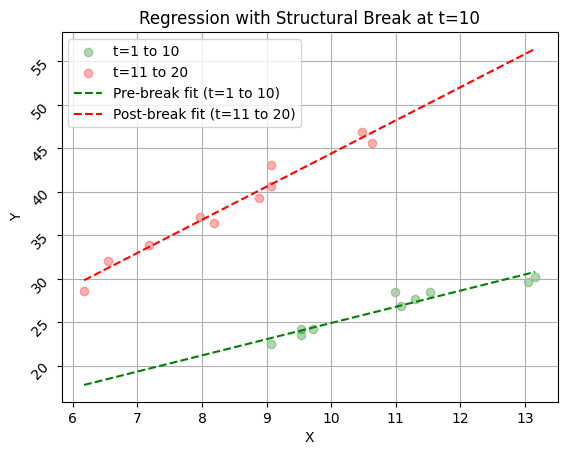

In [ ]:
# Set random seed for reproducibility
np.random.seed(42)

# Simulate data
n = 20  # Total observations
t = np.arange(1, n + 1)  # Time index
X = np.random.normal(10, 2, n)  # Independent variable X ~ N(10, 2)

# Define parameters
alpha = 5  # Intercept
beta_1 = 2  # Slope for t=1 to 10
beta_2 = 4  # Slope for t=11 to 20
epsilon = np.random.normal(0, 1, n)  # Error term ~ N(0, 1)

# Generate Y with a structural break at t=10
Y = np.zeros(n)
for i in range(n):
    if t[i] <= 10:
        Y[i] = alpha + beta_1 * X[i] + epsilon[i]
    else:
        Y[i] = alpha + beta_2 * X[i] + epsilon[i]

# Create dummy variable D of size length of t
D = np.where(t <= 10, 0, 1)

# Create interaction term Z = D * X
Z = D * X

# Prepare data for regression
data = pd.DataFrame({'Y': Y, 'X': X, 'Z': Z})

# Add constant for intercept
data['const'] = 1

# Fit the regression model: Y = alpha + beta_1*X + beta_2*Z + epsilon
model = sm.OLS(data['Y'], data[['const', 'X', 'Z']])
results = model.fit()

# Print regression summary
print(results.summary())

# Extract coefficients and p-value for beta_2
beta_2_pvalue = results.pvalues['Z']
print(f"\nP-value for beta_2 (structural break test): {beta_2_pvalue:.4f}")
if beta_2_pvalue < 0.05:
    print("Reject H0: Evidence of a structural break in the slope at t=10.")
else:
    print("Fail to reject H0: No evidence of a structural break.")

# Visualize the data and fitted lines
plt.scatter(X[:10], Y[:10], color='green', label='t=1 to 10', alpha=0.3)
plt.scatter(X[10:], Y[10:], color='red', label='t=11 to 20', alpha=0.3)

# Plot fitted lines

X_range = np.linspace(min(X), max(X), 100)
alpha_hat, beta_1_hat, beta_2_hat = results.params
# Pre-break: Y = alpha + beta_1*X
Y_pre = alpha_hat + beta_1_hat * X_range
# Post-break: Y = alpha + (beta_1 + beta_2)*X
Y_post = alpha_hat + (beta_1_hat + beta_2_hat) * X_range

plt.plot(X_range, Y_pre, 'g--', label='Pre-break fit (t=1 to 10)')
plt.plot(X_range, Y_post, 'r--', label='Post-break fit (t=11 to 20)')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Regression with Structural Break at t=10')
plt.yticks(rotation=45)
plt.legend()
plt.grid(True)
plt.savefig('regression_with_break.png')
plt.show()